In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual

In [2]:
try:  
    from google.colab import drive
    import sys
    drive.mount('/content/drive')
    ### ATENCION MUY IMPORTANTE CAMBIAR ESTA RUTA PARA QUE SEA IGUAL QUE LA QUE TIENEN EN SU DRIVE, a partir de MyDrive/
    sys.path.append('/content/drive/MyDrive/DNL_unq')
except:
    print("No en Colab")    
from putils import *    

No en Colab


# Oscilador de Van der Pol
 
Partimos de vuelta de las ecuaciones del oscilador armonico simple

$\dot{x} = y$

$\dot{y} = -c y - kx  $
 
Recordamos que $y$ representa la velocidad del oscilador, $\dot{y}$ la aceleracion que es igual a la fuerza aplicada (suponemos masa igual a 1) que es lo que esta en el miembro derecho de la segunda ecuacion. En ese miembro $-kx$ representa la fuerza lineal elastica, mientras que $-cy$ es la friccion, una fuerza que siempre se opone a la velocidad ($c>0$) y que termina frenando el oscilador. En toda esta parte vamos a estudiar diferentes formas generales de esta **friccion** que de forma general vamos a ponerla como funcion de la posicion $x$ y la velocidad $y$:

$\dot{x} = y$

$\dot{y} = -C(x,y)y - kx  $

$Friccion$ $lineal$

$C(x,y)=c$



Es interesante ver que $c$ se puede ver tambien como una resistencia.
De hecho las ecuaciones anteriores describen tambien otro sistema fisico muy estudiado, el circuito RLC:

<div>
<img src="files/RLC.jpg" width="500px">
</div>

Para el caso en serie $c = R/L$ $k=1/LC$ y la variable $y$ corresponde a la corriente que circula por el circuito ($x$ vendria a ser la carga del capacitor).

Nos podemos preguntar ahora que pasaria si usaramos una "resistencia negativa" para valores pequeños de corriente (en realidad estrictamente de carga). Lo que queremos es que el termino $-cy$ se invierta para valores de $x$ pequeños. 

Por que? Porque de esta forma podemos evitar que las oscilaciones "mueran". Si la amplitud de la oscilacion $x$ se hace muy chica (el sistema se frena por la friccion o la resistencia) aparece una fuerza que va **a favor** de la velocidad (o de la circulacion de corriente) inyectandole energia al sistema, sin embargo para amplitudes de oscilacion grandes gana la disipacion (resistencia) que frena el sistema. 

De esta forma se alcanza un equilibrio en el que se producen auto-oscilaciones que no se extinguen. Estas oscilaciones en el espacio de fases se conocen como **ciclos limite** y son conjuntos invariantes (atractores o repulsores) como los puntos fijos. Notar la diferencia con las oscilaciones y orbitas concentricas del oscilador armonico sin friccion. A diferencia de este ultimo las oscilaciones de relajacion (o los ciclos limite en general) son atractoras, es decir que cualquier condicion cercana termina convergiendo a ellas. 


Como podemos escribir esta inversion de la friccion para valores de $x$ cercanos a cero? 
La forma mas simple es usar una nolinealidad cuadratica. Una parabola hundida en el eje tiene valores negativos cerca del $x=0$ y positivos para valores grandes de $x$ (tanto positivos como negativos). Por lo tanto podemos reemplazar a la friccion $c$ por $x^2-\mu$ donde $\mu>0$ es el parametro que define nuestra nueva 'disipacion negativa'. La resistencia (o friccion) en funcion de la posicion del oscilador (o de la carga en el capacitor) seria:

$Friccion$ $Van$ $der$ $Pol$

$C(x,y) = (x^2-\mu)$

Y el sistema de ecuaciones diferenciales queda escrito:

$\dot{x} = y$

$\dot{y} = \mu y -x^2y - x  $

La parte 'negativa' de la resistencia es $+\mu y$, una fuerza que va **a favor** de la velocidad. Estamos asumiendo que $\mu>0$. Mientras que queda un termino $- x^2 y$ que siempre se va a oponer a la velocidad y gana para amplitudes grandes.

La idea de una 'resistencia negativa' no es caprichosa, algunos elementos electronicos de base de semiconductor y valvulares se comportan de esa forma (son activos). De hecho Van der Pol dedujo sus ecuaciones a partir del estudio de un circuito amplificador con un elemento valvular (triodo) en 1927. El mismo efecto se puede observar en tubos de neon y otros elementos con descarga en gases.


<div>
<img src="files/Neon1.PNG" width="300px">
</div>

Una version mas elaborada de este sistema dio lugar al desarrollo del famoso VODER en 1939:

<div>
<img src="files/Voder.PNG" width="500px">
</div>


## Puntos fijos y estabilidad
Vamos a calcular los puntos fijos primero por el metodo de las nulclinas.

La primera nuclina es trivial, una recta horizontal $y=0$ con lo cual todos los puntos fijos van a estar sobre el eje $x$

La segunda nulclina es mas complicada escrita como $y$ en funcion de $x$:

$y = -\Large\frac{x}{x^2-\mu} $

pero el unico punto que esta en las dos curvas es $(0,0)$ que es el unico punto fijo. 

Calculamos la matriz jacobiana


$
\begin{pmatrix}
0 & 1\\
-1-2xy & \mu-x^2
\end{pmatrix}
$

que evaluada en el unico punto fijo da

$
\begin{pmatrix}
0 & 1\\
-1 & \mu
\end{pmatrix}
$

Es facil calcular $Tr=\mu$ y $\Delta=1$. El determinante es siempre positivo y para $\mu=0$ la traza cambia de signo, los autovalores son puramente imaginarios y tenemos una **bifurcacion de Hopf**

Cuando $\mu<0$ el punto fijo del origen es atractor y todas las trayectorias terminan alli.

Cuando $\mu>0$ el origen se hace repulsor, pero globalmente el flujo es atractor, para valores grandes de $x$ y de $y$ la disipacion no lineal $-x^2y$ domina y actua como un atractor global. Por lo tanto se va a formar un ciclo limite estable en el medio. Veamos como son las nulclinas y el flujo.

Para la interpretacion de los colores del fondo ver el grafico de la seccion siguiente

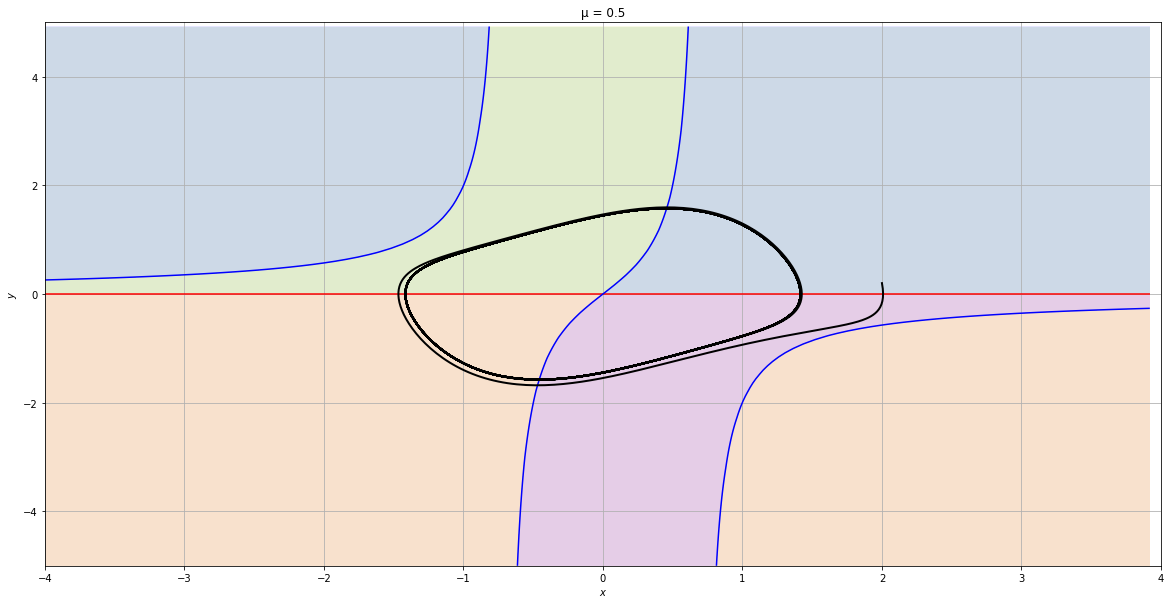

In [3]:
#definimos la Ed para el oscilador de VanderPol
def vanderpol(t, x, μ):
    return[
        x[1],
        (μ-x[0]**2)*x[1]-x[0],
    ]

dt = 0.02; tmax = 100; pars={'μ':0.5}
xini = [2,0.2]
solve_plot2D_nulclinas(vanderpol,pars,xini,tmax,dt,ranges=[[-4,4],[-5,5]])

## Representacion del flujo

Otra representacion util del espacio de fases es asignar a cada punto una flecha que indique la direccion del flujo (quiver). Las flechas pueden estar a escala o no para indicar la intensidad del flujo (la magnitud de la derivada en cada componente). Si bien la escala es util, para los osciladores de relajacion a veces hay mucha diferencia de escala entre el flujo lento y el rapido y la imagen resulta confusa. Con esta representacion resulta mas o menos facil seguir 'a ojo' las trayectorias en el espacio de fases.

En esta representacion agregamos tambien colores para poder diferenciar mejor la orientacion del flujo en el espacio de fases. En el grafico la nulclina para $\dot{x}=0$ es la linea horizontal en rojo y divide al espacio en dos regiones: una arriba $\dot{x}>0$ que pintamos de verde (con transparencia) y otra abajo $\dot{x}<0$ que pintamos de rojo.

La nuclina para $\dot{y}=0$ esta en azul tiene 3 ramas y divide al espacio de fases en cuatro franjas que pintamos de colores alternados azul (para $\dot{y}<0$) y amarillo (para $\dot{y}>0). En combinacion con los colores transparentes de la nulclina anterior tenemos cuatro tipo de regiones:

- color verde + azul = cyan donde el flujo va hacia la derecha ($\dot{x}>0$) y abajo ($\dot{y}<0$)
- color verde + amarillo = verde claro donde el flujo va hacia la derecha ($\dot{x}>0$) y arriba ($\dot{y}>0$)
- color rojo + amarillo = naranja donde el flujo va hacia la izquierda ($\dot{x}<0$) y arriba ($\dot{y}>0$)
- color rojo + azul = magenta donde el flujo va hacia la izquierda ($\dot{x}<0$) y abajo ($\dot{y}<0$)

Nota que para pasar de la region naranja a la verde o de la cyan a la magenta hay que cruzar la nulclina roja y en la frontera todas las flechas son verticales (esto es porque ahi $\dot{x}=0$). Mientras que para cruzar de la region cyan a la verde o de la naranja a la magenta se cruza la nulclina azul y ah todas las flechas son horizontales (estrictamente sobre la nuclina $\dot{y}=0$). Al mismo tiempo no se puede pasar de la region verde a la magenta directo o de la azul a la naranja, salvo a traves del punto fijo del medio.

In [ ]:
dt = 0.02; tmax = 100; pars={'μ':0.5}
xini = [2,0.2]
solve_plot2D_quiver(vanderpol,pars,0.2,0.2,scale=50,ranges=[[-4,4],[-4,4]])

In [ ]:
def plot2D_vanderpol_interactive(μ,x0,y0,tmax,xmax,ymax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'μ':μ}
    solve_plot2D_nulclinas(vanderpol,pars,xini,tmax,dt,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot1 = interactive(plot2D_vanderpol_interactive,
                    μ = (-3.0, 3.0, 0.001),
                    x0=(-4,4,0.01), 
                    y0=(-4,4,0.01), 
                    tmax=(1,100,0.01),
                    xmax=(0,10,0.1),
                    ymax=(0,10,0.1))

iplot1    

In [ ]:
def plot2D_vanderpol_interactive_quiver(μ,xmax,ymax):
    pars={'μ':μ}
    solve_plot2D_quiver(vanderpol,pars,0.2,0.2,scale=50,ranges=[[-xmax,xmax],[-ymax,ymax]])
    
iplot2 = interactive(plot2D_vanderpol_interactive_quiver,
                    μ = (-3.0, 3.0, 0.001),
                    xmax=(0,10,0.1),
                    ymax=(0,10,0.1))

iplot2    

## Osciladores de relajacion. Transformacion de Lienard

Se puede hacer un cambio de coordenadas no lineal (sin meternos en los detalles ) que transforme a la forma anterion del Van der Pol en otra donde se pueda analizar mejor el ciclo limite. El cambio es el siguiente

$x_1 = \mu^{-1/2}x$

$y_1 = \mu^{-3/2}(\mu x - x^3/3 -y)$

En las nuevas variables el sistema queda escrito como 

$\dot{x_1} = \mu(x_1-x_1^3/3-y_1)$

$\dot{y_1} = x_1/\mu$

como antes el unico punto fijo esta en $(0,0)$ pero la primera nulclina se puede escribir como una cubica que tiene siempre forma de "N":

$y_1 = x_1 - x_1^2/3$

y la otra es una recta vertical en $x_1=0$

Pero lo interesante pasa cuando $\mu$ es grande. Como esta dividiendo a la variacion de $y_1$ y multiplicando a la variacion de $x_1$, podemos imaginar que el flujo va a ser mucho mas rapido en la direccion horizontal $\dot{x_1}>>\dot{x_2}$, salvo cuando se aproxima a la nulclina en forma de "N" (porque ahi se hace $\dot{x_1}=1$). 
Entonces tenemos un flujo rapido horizontal que va a parar a la nulclina en forma de "N". 

Toda la zona que esta arriba de la N ($y_1>x_1-x_1^3/3$ hace $\dot{x_1}$ sea negativo) fluye hacia la izquierda y lo que esta abajo de la N ($y_1<x_1-x_1^3/3$ hace $\dot{x_1}$ sea positivo) fluye a la derecha.

Esto hace que en terminos del flujo horizontal la parte del medio de la N sea inestable (el flujo se aleja de ella) y las ramas de los costados sean estables (el flujo es atraido hacia ellas)

Una vez que la trayectoria esta cerca de la nulclina N va a fluir lentamente siguiendo el signo de $x_1$: hacia abajo a la izquierda del eje vertical y hacia arriba a la derecha del eje. 

Cuando la orbita llega al "codo" de la N se encuentra con la rama inestable de la nulclina y 'salta' (relaja) a la otra rama estable. Esto es lo que se conoce como un oscilador de relajacion.

Atencion porque esta forma sirve para ver mejor el ciclo limite pero por la transformacion de coorenadas la bifurcacion de Hopf es 'degenerada' ($\mu=0$ implicaria ademas que $\dot{y_1}$ se hiciese infinito).

In [ ]:
#definimos la Ed para el oscilador de VanderPol en la version de Lienard (oscilador de relajacion)
def vanderpol2(t, x, μ):
    return[
        μ*(x[0]*(1.0-x[0]**2/3.0)-x[1]),
        x[0]/μ,
    ]

def plot2D_vanderpol2_interactive(μ,x0,y0,tmax,xmax,ymax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'μ':μ}
    solve_plot2D_quiver(vanderpol2,pars,0.1,0.1,xini,tmax,dt,scale=50,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot3 = interactive(plot2D_vanderpol2_interactive,
                    μ = (0.1, 5.1, 0.001),
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,100,0.01),
                    xmax=(0,4,0.1),
                    ymax=(0,3,0.1))

iplot3    

# Auto-Oscilador de Rayleigh. Lengueta. 

El oscilador de van der Pol lo habiamos presentado como el auto-oscilador con 'friccion negativa' mas simple posible porque la no linealidad era cuadratica y estaba solo en la variable $x$. Esa dependencia de la resistencia en $x$ aparecia de forma natural en circuitos valulares (tristores) y lo presentamos por motivos historicos.

Pero la no linealidad que da una zona de friccion negativa puede ser una funcion de la velocidad $y$ en lugar de $x$. De hecho esta forma aparece naturalmente cuando la fuerza que da impulso al oscilador cuando tiene poca amplitud es de origen aerodinamico. Entonces en su forma mas simple, con una no linealidad cuadratica podemos proponer la friccion no lineal.

$Friccion$ $Rayleigh$

$C(x,y)=y^2-\mu$

Comparar con la friccion de Van der Pol del principio. Esta forma la llamamos de Rayleigh porque es quien en su Teoria del Sonido en 1865 propone este modelo para la oscilacion de una lengueta de clarinete:

$\dot{x} = y $

$\dot{y} = -(y^2-\mu)y-kx$

donde $k$ determina la frecuencia de oscilacion y vamos a tomar como $k=1$ en lo que sigue. El sistema anterior se puede escribir entonces, distribuyendo los dos terminos de la fraccion:

$\dot{x} = y $

$\dot{y} = \mu y-y^3-x$

De forma analoga que en el modelo de Van der Pol el termino $y^3$ representa la friccion no lineal que atenua las oscilaciones para amplitudes grandes y $\mu y$ es la 'friccion negativa' que actua para valores pequeños de $y$ como fuerza restitutiva y representa la accion del clarinetista generando una inestabilidad con el flujo del aire contra la lengueta.

El calculo de las nulclinas los puntos fijos y la estabilidad de los mismo queda para la practica. Pero se puede notar al jugar con los parametros que hay una bifurcacion de Hopf al igual que en el Van der Pol. Para que valor de $\mu$?

In [ ]:
# Escribimos la ecuacion de la lengueta
def reed(t, x, μ):
    return[
        x[1],
        x[1]*(μ-x[1]**2)-x[0],
    ]

def plot2D_reed_interactive(μ,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/300
    pars={'μ':μ}
    solve_plot2D_quiver(reed,pars,0.2,0.2,xini,tmax,dt,scale=50,ranges=[[-3,3],[-2,2]])
    #solve_plot(reed,pars,xini,tmax,dt,ranges=[[-3,3],[-2,2]])


iplot4 = interactive(plot2D_reed_interactive,
                    μ = (-1.0,1.0,0.001),
                    x0=(-4,4,0.01), 
                    y0=(-4,4,0.01), 
                    tmax=(1,100,0.01))

iplot4    

In [ ]:
#Version con solve_plot para ver la forma de onda
def plot2D_reed_interactive(μ,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/300
    pars={'μ':μ}
    solve_plot(reed,pars,xini,tmax,dt,ranges=[[-3,3],[-2,2]])


iplot4b = interactive(plot2D_reed_interactive,
                    μ = (-1.0,2.0,0.001),
                    x0=(-4,4,0.01), 
                    y0=(-4,4,0.01), 
                    tmax=(1,100,0.01))

iplot4b  

# Oscilador Frotado (violin puntual)

Otro sistema con auto-oscilaciones simples fue propuesto (tambien por Rayleigh en 1877!) para modelar la accion de **slip & stick** del arco contra la cuerda del violin, pero se puede aplicar a un monton de sistemas que generan autooscilaciones a partir de la friccion.

<div>
<img src="files/Conveyor.PNG" width="300px">
</div>


El modelo propuesto era similar al de la figura. Una masa unida a un resorte esta apoyada sobre una cinta transportadora con friccion que se mueve con velocidad constante hacia la derecga. Al principio el rozamiento estatico hace que la masa este adherida (momento **stick**) a la cinta y ejerce una fuerza que iguala a la del resorte. Pero la friccion estatica tiene un valor maximo y cuando el resorte esta muy estirado no puede superar la fuerza elastica y la masa es arrastrada por el resorte y desliza con rozamiento dinamico sobre la cinta hacia la izquierda (momento **slip**) y puede llegar por inercia incluso a comprimir un poco el resorte hasta que la masa se frena y queda enganchada de vuelta por el rozamiento estatico y se repite el proceso.

Si bien se trata de un sistema simple, la forma funcional de la friccion (que tiene que ser funcion de la diferencia de velocidad entre la masa y la cinta es decir si desliza o no) no puede ser algo tan simple como una cuadratica o una cubica porque tiene que cambiar de signo bruscamente, ya que la friccion tiene que ser maxima para deslizamientos bajos e ir decreciendo para deslizamientos mas rapidos. La forma clasica es algo asi:

<div>
<img src="files/Friction.PNG" width="300px">
</div>

donde $\dot{x}-v$ es el 'deslizamiento', es decir la diferencia de velocidades entre la masa y la cinta. Cuando la masa esta adherida a la cinta $C$ puede tomar todos los valores en la vertical hasta un valor maximo hacia un lado y hacia el otro y luego 'salta' al rozamiento dinamico que es menor a medida que el deslizamiento es mas cada vez rapido.

La forma funcional que esta representada arriba para el desplazamiento $d=\dot{x}-v$  es:

$C(d)=sign(d) e^{-2|d|}$

Ese salto brusco de la funcion signo trae problemas numericos, lo regularizamos con la funcion arco tangente del desplazamiento dividido por un numero pequeño. el arcotangente es un escalon mas suave que el signo (si el valor se hace muy pequeño se va haciendo cada vez mas parecido a la funcion signo).

$C_{bow}(d)=arctan(d/\epsilon) e^{-2|d|}$

Con todos estos elementos la friccion del Arco propuesta por Rayleigh y el sistema final queda escrito

$\dot{x}=y$

$\dot{y}=-\mu C_{bow}(y-v) -x$


In [ ]:
def friction(x):
    ϵ = 0.05
    return np.arctan(x/ϵ)*np.exp(-2*np.abs(x))
    
def bow(t, x, μ, v):
    return[
        x[1],
        -μ*friction(x[1]-v)-x[0],
    ]

def plot2D_bow_interactive(μ,v,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/300
    pars={'μ':μ,'v':v}
    solve_plot2D_quiver(bow,pars,0.2,0.2,xini,tmax,dt,scale=50,ranges=[[-3,3],[-2,2]])

iplot1 = interactive(plot2D_bow_interactive,
                    μ = (0, 3.0, 0.001),
                    v = (-1.0,1.0,0.001), 
                    x0=(-4,4,0.01), 
                    y0=(-4,4,0.01), 
                    tmax=(1,100,0.01))

iplot1    

In [ ]:
def plot2D_bow_interactive(μ,v,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/300
    pars={'μ':μ,'v':v}
    solve_plot(bow,pars,xini,tmax,dt,ranges=[[-3,3],[-2,2]])

iplot1 = interactive(plot2D_bow_interactive,
                    μ = (0, 3.0, 0.001),
                    v = (-1.0,1.0,0.001), 
                    x0=(-4,4,0.01), 
                    y0=(-4,4,0.01), 
                    tmax=(1,100,0.01))

iplot1    


## Auto Osciladores en flujos hidrodinamicos y elastodinamicos

Las auto-oscilaciones apararecen de forma espontanea en sistemas mas complejos, extensos y con delay (ambas cosas llevan a un sistema de $\infty$ ecuaciones diferenciales) en fluidos, como el flutter responsable del temblor de las alas y aletas y el flujo oscilatorio que pasa un obstaculo para una velocidad de fluido suficientemente alta, dando lugar a los vortices de von Karman.

<div>
<img src="files/Vortex-street-animation.gif" width="500px">
</div>

Puede verse a partir de las ecuaciones de los fluidos (Navier Stokes) que estas auto-oscilaciones se originan a partir de una bifurcacion de Hopf

# Oscilador de Duffing van der Pol

En todos los osciladores anteriores la fuerza de restitucion era lineal, pero podemos considerar osciladores de forma mas general como:

$\dot{x} = y$

$\dot{y} = -C(x,y)y - K(x)$

en el caso del oscilador armonico $C(x,y)=c$ y $K(x)=kx$. En el oscilador de Van der Pol y en de Rayleigh cambia la forma de $C(x,y)$ pero la restitucion sigue siendo lineal. 

El oscilador de Duffing propone una fuerza de restitucion cubica: $K(x)=x^3-\beta x$.

Podemos combinar la restitucion cubica de Duffing con la friccion negativa de Van der Pol para tener un auto-oscilador no lineal con mas variedad de comportamiento. Tenemos entondes el modelo de Duffing-Van der Pol:

$\dot{x} = y$

$\dot{y} = \mu y -x^2y +\beta x - x^3$


In [ ]:
#definimos la Ed para el oscilador de Duffing-VanderPol
def duffing_vanderpol(t, x, β, μ):
    return[
        x[1],
        (μ-x[0]**2)*x[1]+x[0]*(β-x[0]**2),
    ]

def plot2D_duffing_vanderpol_interactive(β,μ,x0,y0,tmax,xmax,ymax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'β':β,'μ':μ}
    solve_plot2D_quiver(duffing_vanderpol,pars,0.1,0.1,xini,tmax,dt,scale=50,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot2 = interactive(plot2D_duffing_vanderpol_interactive,
                    β = (-1.0,1.0,0.001),
                    μ = (-1.0, 1.0, 0.001),
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,100,0.01),
                    xmax=(0,3,0.1),
                    ymax=(0,4,0.1))

iplot2    

In [ ]:
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1,1,5) for y0 in np.linspace(-0.5,0.5,5)]
dt = 0.1; tmax = 150; pars={'β':0.5,'μ':0.45}
solve_plot2D_multiple(duffing_vanderpol,pars,xini_array,tmax,dt,ranges=[[-1.5,1.5],[-1,1]],method='RK45')

# FitzHugh Nagumo

Otro Auto Oscilador famoso y que funciona como modelo mas simple (continuo) de una neurona biologica es el sistema de FitzHugh-Nagumo que puede escribirse como:

$\dot{x} = x-\Large\frac{x^3}{3}\normalsize-y + I$

$\dot{y} = (x +a -by)/\mu$

Donde hay dos parametros  ($a$,$b$) que caracterizan la excitabilidad de la neurona, $\mu$ es la diferencia de escala temporal entre el flujo lento/rapido y la vamos a fijar en 10, y una corriente sinaptica externa $I$. El estudio de los puntos fijos y las bifurcaciones queda para la practica. 

Notar que para el caso $a=0$, $b=0$ el sistema se reduce al oscilador de Van der Pol (en la forma de Lienard)

In [ ]:
#definimos la Ed para la Neurona de FitzHugh Nagumo
def fitzhugh_nagumo(t, x, a, b, I):
    return[
        x[0]*(1.0-x[0]*x[0]/3.0)-x[1]+I,
        (x[0]+a-b*x[1])/10.0,
    ]

def plot2D_fitzhugh_nagumo_interactive(a,b,I,x0,y0,tmax,xmax,ymax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'a':a,'b':b,'I':I}
    solve_plot2D_quiver(fitzhugh_nagumo,pars,0.1,0.1,xini,tmax,dt,scale=50,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot2 = interactive(plot2D_fitzhugh_nagumo_interactive,
                    a = (-1.0,1.0,0.001),
                    b = (-1.0, 1.0, 0.001),
                    I = (0, 10.0, 0.001), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,100,0.01),
                    xmax=(0,3,0.1),
                    ymax=(0,2,0.1))

iplot2    

In [ ]:
def plot2D_fitzhugh_nagumo_interactive(a,b,I,x0,y0,tmax,xmax,ymax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'a':a,'b':b,'I':I}
    solve_plot(fitzhugh_nagumo,pars,xini,tmax,dt,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot2 = interactive(plot2D_fitzhugh_nagumo_interactive,
                    a = (-1.0,1.0,0.001),
                    b = (-1.0, 1.0, 0.001),
                    I = (0, 10.0, 0.001), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,100,0.01),
                    xmax=(0,3,0.1),
                    ymax=(0,4,0.1))

iplot2    

# Resonancias No lineales, respuestas a un Forzado

Los auto-osciladores se diferencian fundamentalmente de un oscilador harmonico forzado porque no necesitan de una frecuencia externa que se sintonice a su frecuencia de resonancia, el propio auto-oscilador setea su propia frecuencia y fase a partir de su dinamica intrinseca.

En este sentido son osciladores activos, no solo porque tienen su propia fuente de energia sino porque intentan mantener en la medida de lo posible su propia frecuencia de oscilacion cuando son sometidos a un forzado externo, pero cuando la frecuencia del forzado externo se aparta de su auto-frecuencia la respuesta es no trivial. 

A diferencia del oscilador armónico que siempre se somete a la frecuencia del forzado y su unica libertad de respuesta esta en la amplitud y fase de la oscilación, la respuesta del auto-oscilador a un forzado puede ser muy compleja, multiperiódica o cuasi-periódica (sin llegar nunca a ser completamente aperiódica o caótica como en el caso del auto-oscilador de Duffing-Van der Pol que vamos a ver mas adelante)

## Van der Pol Forzado

En el caso de oscilador de Van der Pol introducimos el forzado como una fuerza periodica con dos parametros de control: la frecuencia angular $\omega$ y la amplitud del forzado $A$. Como es una fuerza, se agrega como un termino en la segunda ecuacion, junto con la fuerza restitutiva $-x$ y la disipacion no lineal $\mu(1-x^2)y$. 

Sin embargo, antes de escribir las ecuaciones conviene recordar que cuando definimos un sistema dinamico dijimos que las reglas de evolucion, dadas por las ecuaciones diferenciales eran fijas y no se modificaban en el tiempo. Sin embargo, siempre podemos escribir un sistema uqe depende del tiempo 'inventando' el tiempo como una nueva variable, o en el caso de una funcion periodica, la fase del forzado $\phi$. De esta forma podemos escribir el Van der Pol forzado de la siguiente forma.

$\dot{x} = y$

$\dot{y} = \mu y -x^2y - x + A sin(\phi) $

$\dot{\phi} = \omega$

al costo de agregar una dimension mas, el flujo ahora es 3D. De todos modos vamos a proyectar en el plano $(x,y)$ pero teniendo en cuanta que ahora sobre el espacio de fases (o mejor dicho sobre su proyeccion) vamos a ver trayectorias que se cruzan pero que corresponden a dos coordenadas de $\phi$ diferentes.

De todos modos si bien la forma anterior es la forma correcta de escribir un sistema dinamico. por ahora escribimos las ecuaciones usando la dependencia explicita del tiempo porque es mas eficiente para el calculo y para poder usar las funciones que veniamos utilizando


In [ ]:
def vanderpol_forced(t, x, μ, A, ω):
    return[
        x[1],
        μ*(1-x[0]**2)*x[1]-x[0]+A*np.sin(ω*t),
    ]

In [ ]:
import importlib as imp
import putils
from putils import *
imp.reload(putils)
from putils import *

In [ ]:
def plot2D_vanderpol_forced_interactive(μ,A,ω,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/500
    pars={'μ':μ,'A':A,'ω':ω}
    trans = tmax/4
    solve_plot(vanderpol_forced,pars,xini,tmax,dt,trans=trans)
    
iplot3 = interactive(plot2D_vanderpol_forced_interactive,
                    μ = (-0.4, 2.0, 0.001),
                    A = (0,1.0,0.001),
                    ω = (0,1.0,0.001), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(0,200,0.1))

iplot3    

## Recurrence Plot

Una mejor forma de visualizar la periodicidad es mediante un **recurrence plot** donde las estructuras periodicas se ven como lineas diagonales y el periodo es el espaciamiento entre las lineas. Como referencia se muestra ademas el periodo del forzado.



In [ ]:
def recurrent_vanderpol_forced_interactive(μ,A,ω,ncycles,ee):
    xini = [1,-1]
    tmax = np.pi*ncycles
    dt = 0.1
    pars={'μ':μ,'A':A,'ω':ω}
    trans = tmax/2
    eps = np.power(10.0,ee)
    recurrence_plot(vanderpol_forced,pars,xini,tmax,dt,trans=trans,eps=eps,period=2*np.pi/ω)


iplot4 = interactive(recurrent_vanderpol_forced_interactive,
                    μ = (0.0, 2.0, 0.001),
                    A = (0,1.0,0.001),
                    ω = (0,3.0,0.001), 
                    ncycles=(1,200,1),
                    ee=(-3,-1,0.001))

iplot4    

## Duffing Forzado

Para ver otro sistema forzado periodico donde la respuesta es mucho mas irregular volvemos al oscilador de Duffing (con friccion lineal). Recordar que llegamos a este sistema escribiendo primero la ecuacion del oscilador armonico de forma general con una fuerza de restitucion $K(x)$

$\dot{x}=y$

$\dot{y}=-\mu y + K(x)$

y eligiendo una fuerza de restitucion con un termino lineal y uno cubico

$K(x) = \beta x - x^3$

Como para valores de $x$ grande va a dominar el termino cubico esta garantizado que el sistema es globalmente atractor porque si $x$ es muy positivo $-K(x)$ es muy negativo y viceversa.

El oscilador de Duffing NO es un auto oscilador porque no tiene friccion negativa (inyeccion de energia). De todas formas lo que nos interesa estudiar aca es el oscilador de Duffing forzado:

$\dot{x} = y$

$\dot{y} = -\mu y + \beta x -  x^3 + A sin(\phi)$

$\dot{\phi} = \omega$

In [ ]:
def duffing_forced(t, x, μ, β, A, ω):
    return [
        x[1],
        -μ*x[1]+x[0]*(β-x[0]**2)+A*np.sin(ω*t),
    ]

In [ ]:
def plot2D_duffing_forced_interactive(μ,β,A,ω,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/500
    pars={'μ':μ,'β':β,'A':A,'ω':ω}
    trans = tmax/4
    solve_plot(duffing_forced,pars,xini,tmax,dt,trans=trans)
    
iplot3 = interactive(plot2D_duffing_forced_interactive,
                    μ = (0, 2.0, 0.001),
                    β = (-5.0,2.0,0.001), 
                    A = (0,5.0,0.001),
                    ω = (0,2.0,0.001), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(0,100,0.1))

iplot3    

In [ ]:
def recurrent_duffing_forced_interactive(μ,β,A,ω,ncycles,ee):
    xini = [1,-1]
    tmax = np.pi*ncycles
    dt = 0.1
    pars={'μ':μ,'β':β,'A':A,'ω':ω}
    trans = tmax/2
    eps = np.power(10.0,ee)
    recurrence_plot(duffing_forced,pars,xini,tmax,dt,trans=trans,eps=eps,period=2*np.pi/ω)


iplot4 = interactive(recurrent_duffing_forced_interactive,
                    μ = (0.0, 2.0, 0.001),
                    β = (-2.0,2.0,0.001),
                    A = (0,1.0,0.001),
                    ω = (0,3.0,0.001), 
                    ncycles=(1,200,1),
                    ee=(-4,-3,0.001))

iplot4    

# Subarmonicos. Oscilador cuadratico

Cuando escribimos una forma no lineal para la restitucion $K(x)$ en el oscilador de Duffing elegimos agregar un termino cubico. Que hubiese pasado si en lugar de eso hubiesemos elegido un termino cuadratico? El problema es que el sistema no es globalmente atractor porque para valores de $x$ grande la restitucion es o siempre positiva o siempre negativa y para uno de los dos lados van a escaparse trayectorias. Podemos solucionar eso agregando un termino cuadratico y un termino cubico, pero poniendo un coeficiente muy chico al termino cubico y agregando un parametro al termino cuadratico que es el que nos interesa estudiar. De esta forma la fuerza de restitucion quedaria.

$K(x) = -x +\alpha x^2 - \delta x^3$

y eligiendo por ejemplo $\delta=0.01$. Notar que ahora el parametro $\alpha$ lo colocamos en el termino cuadratico (en Duffing el parametro de control $\beta$ estaba en el termino lineal.
De esta forma cuando $\alpha$ sea igual a cero voy a tener el oscilador armonico para pequeñas oscilaciones, y a medida que voy subiendo el parametro $\alpha$ voy incrementando la no linealidad del oscilador.

El oscilador cuadratico se puede escribir entonces, con un termino de forzado externo como:

$\dot{x} = y$

$\dot{y} = -\mu y - x +\alpha x^2 -  0.01 x^3 + A sin(\phi)$

$\dot{\phi} = \omega$

A diferencia del oscilador de Duffing que tiende a ser simetrico en el eje x, el oscilador cuadratico va a ser mucho mas asimetrico para valores considerables de $\alpha$ y vamos a ver ciclos limites con forma de 'huevo'.

Pero la caracteristica mas relevante que tiene el osiclador cuadratico forzado es la aparicion de subarmonicos, incluso sin variar la frecuencia del forzado, a medida que se incrementa la amplitud. Esta aparicion de subarmonicos (que puede dar lugar a una casacada de duplicaciones de periodo que de lugar a la aparcion de Caos) se observa en muchos ociladores no lineales en el mundo real.

Para el sistema que sigue probar por ejempo: 
$\mu = 0.35$, $\alpha=0.2$ $\omega=1$ para valores crecientes de $A$

In [ ]:
def quadratic_forced(t, x, μ, α, A, ω):
    return [
        x[1],
        -μ*x[1]-x[0]*(1.0-α*x[0]+0.01*x[0]**2)+A*np.sin(ω*t),
    ]

In [ ]:
def plot2D_quadratic_forced_interactive(μ,α,A,ω,tmax):
    xini = [0,0]
    dt = tmax/1000
    pars={'μ':μ,'α':α,'A':A,'ω':ω}
    trans = tmax/2
    solve_plot(quadratic_forced,pars,xini,tmax,dt,trans=trans)
    
iplot3 = interactive(plot2D_quadratic_forced_interactive,
                    μ = (0, 1.0, 0.001),
                    α = (-1,1,0.001), 
                    A = (0,5.0,0.001),
                    ω = (0,2.0,0.001), 
                    tmax=(0,300,0.1))

iplot3    

# Caos

Para ciertos valores de parametros (probar por ejemplo μ = 0.05, β = 1.0, A = 0.44, ω = 0.21) el oscilador de Duffing forzado presenta orbitas aperiodicas, esto es que no se cierran nunca y van llenando el espacio de fases de forma densa en una region. 

Es ademas muy dificil (por no decir imposible en la practica) predecir la evolucion de la trayectoria y anticipar en cual de los lobulos (x positivo o x negativo) va a estar la trayectoria luego de un cierto tiempo. El sistema tiene una de las caracteristicas que define a los **sistemas caoticos**. Una perturbacion infinitesimal en las condiciones iniciales conduce a dos trayectorias que se apartan entre si exponencialmente, algo que se conocio durante el boom de la Teoria del Caos en los '80 como "efecto Mariposa"

Las dos caracteristicas que definen un sistema caotico de forma mas rigurosa son

- Mixing topologico: cualquier region del espacio de fases por pequeña que sea se va a superponer con la evolucion temporal de cualquier otra region si se espera el tiempo suficiente
- Sensibilidad a las condiciones iniciales (efecto Mariposa), dos condiciones inciales muy proximas se alejan entre si durante un tiempo con una tasa de crecimiento exponencial. 
- Otra caracteristica que hace mas rigurosa la definicion es la existencia de infinitas orbitas periodicas inestables.

Nos va a interesar caracterizar solo la segunda propiedad, usamos la funcion butterfly para pasar una condicion incial xini y una perturbacion eps de $10^{-12}$ y en el grafico de la derecha vemos como se alejan entre si en escala logaritmica. A la pendiente positiva se la conoce como **exponente de Lyapunov**. Se puede probar otro sistema que converja a un atractor y mostrar que se ve una pendiente negativa. Un exponente de Lyapunov positivo se considera indicio de Caos.

In [ ]:
μ = 0.05
β = 1.0
A = 0.44
ω = 0.21
xini = [1,-1]
ncycles = 200
tmax = np.pi*ncycles
dt = 0.05
pars={'μ':μ,'β':β,'A':A,'ω':ω}
butterfly(duffing_forced,pars,xini,tmax,dt,eps=1e-12)